In [2]:
import numpy as np
from numpy import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
a10 = 0.1
v1 = 5
v2 = 5
v3 = 10
b = 0

a2 = 36*a10 + 13*b/12 - 31*v1/96 - 9*v2/4 - 3*v3/32

a3 = -60*a10 - 41*b/36 + 133*v1/144 - 3*v2/4 + 53*v3/432

a4 = -35*a10 - 191*b/108 - 2683*v1/3456 + 47*v2/16 + 467*v3/3456

a5 = 110*a10 + 241*b/108 - 361*v1/3456 - v2/4 - 823*v3/3456

a6 = -37*a10 + 31*b/108 + 901*v1/1728 - 9*v2/8 + 19*v3/1728

a7 = -40*a10 - 113*b/108 - 539*v1/1728 + v2/2 + 187*v3/1728

a8 = 35*a10 + 43*b/108 + 269*v1/3456 - v2/16 - 181*v3/3456

a9 = -10*a10 - 5*b/108 - 25*v1/3456 + 25*v3/3456 

In [4]:
def Uprime(x):
    return (2*a2*x
            + 3*a3*x**2
            + 4*a4*x**3
            + 5*a5*x**4
            + 6*a6*x**5
            + 7*a7*x**6
            + 8*a8*x**7
            + 9*a9*x**8
            + 10*a10*x**9)

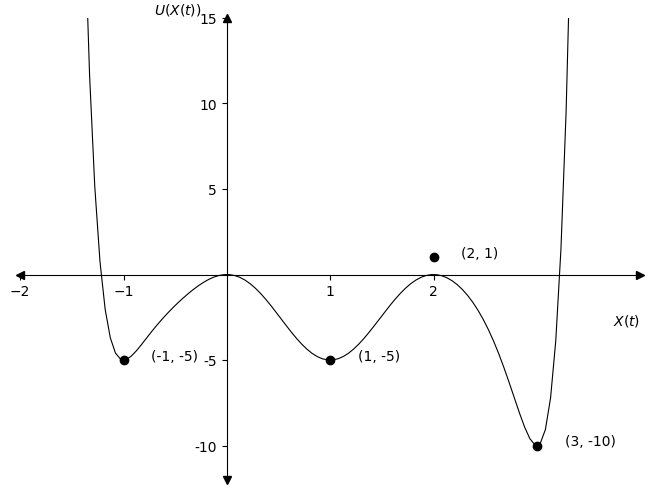

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-range.
x = np.linspace(-10, 10, 400)

# Compute U using your data.
# Replace the expression below with your actual definition if it differs.
U = a10 * x**10 + a9 * x**9 + a8 * x**8 + a7 * x**7 + a6 * x**6 + a5 * x**5 + \
    a4 * x**4 + a3 * x**3 + a2 * x**2

# Create the figure and axis.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot the data in black with a linewidth of 0.8.
ax.plot(x, U, 'k-', linewidth=0.8)

# Set x and y limits.
plt.xlim(-2, 4)
plt.ylim(-12, 15)

# Adjust x-tick parameters and set specific x-ticks.
ax.tick_params(axis='x', which='major')
plt.xticks([-2, -1, 1, 2])

# Define y-ticks and set their labels.
ax.set_yticks([-10, -5, 5, 10, 15])
ax.set_yticklabels(['-10', '-5', '5', '10', '15'])

# Set axis labels.
plt.xlabel(r'$X(t)$', loc='right', labelpad=10)
plt.ylabel(r'$U(X(t))$', loc='top', rotation=0, labelpad=-5)

# Shift the left and bottom spines to the center (so they cross at (0,0))
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add arrowheads to the axes.
# Arrowheads are positioned relative to the axes; adjust these coordinates if needed.
ax.plot((0), (1), '^k', transform=ax.get_xaxis_transform(), clip_on=False)  # Top arrow on y-axis
ax.plot((0), (0), 'vk', transform=ax.get_xaxis_transform(), clip_on=False)  # Bottom arrow on y-axis
ax.plot((1), (0), '>k', transform=ax.get_yaxis_transform(), clip_on=False)  # Right arrow on x-axis
ax.plot((0), (0), '<k', transform=ax.get_yaxis_transform(), clip_on=False)  # Left arrow on x-axis

points = [(-1, -5), (1, -5), (2, 0), (3, -10)]
for (px, py) in points:
    plt.plot(px, py, marker='o', color='black')
    plt.annotate(f'({px}, {py})', xy=(px, py), xytext=(20, 0), textcoords='offset points')

# Save the figure as an SVG with a transparent background.
plt.savefig('triple_well_pot.svg', transparent=True)
plt.show()

In [6]:
def EM_triple(X0, dt, epsilon, U_prime, num_steps, num_trajectories, dW):

    if num_trajectories == 1:
        X = np.zeros(num_steps + 1)
    else:
        X = np.zeros((num_steps + 1, num_trajectories))
    
    # Set initial condition
    X[0] = X0
    
    for n in range(num_steps):

        t = n * dt
        
        drift = -U_prime(X[n])
        
        #dW = np.sqrt(dt) * np.random.randn(num_trajectories) if num_trajectories > 1 else np.sqrt(dt) * np.random.randn()
        
        X[n+1] = X[n]  + drift * dt + np.sqrt(epsilon) * dW[n]
    
    return X 

In [8]:
X0 = -1
dt = 0.001
T = 8000
epsilon = 1.2
num_steps = int(T/dt)
num_trajectories = 100
dW = [np.sqrt(dt) * np.random.randn(num_trajectories) for _ in range(num_steps)]

X_em = EM_triple(X0, dt, epsilon, Uprime, num_steps, num_trajectories, dW)

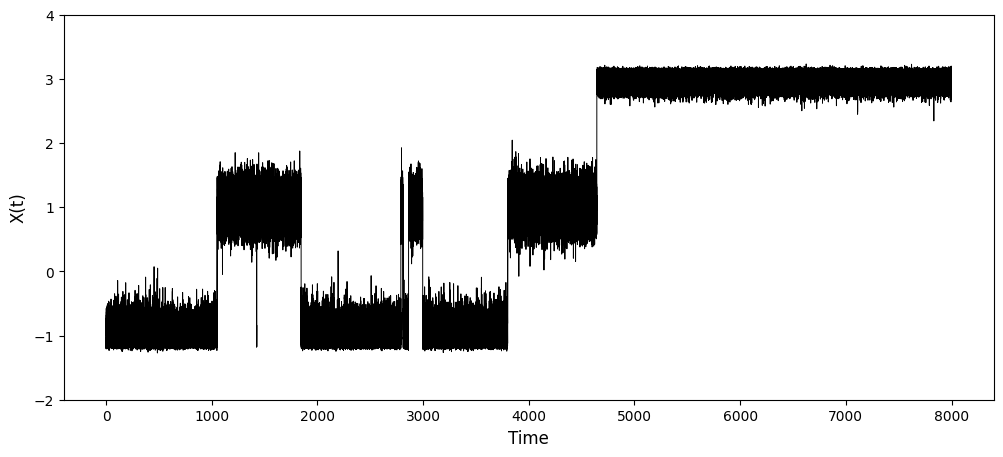

In [9]:
time = np.linspace(0, T, num_steps+1)
plt.figure(figsize=(12, 5))
plt.plot(time, X_em[:,2], color='black', linewidth=0.7)
plt.xlabel("Time", fontsize=12)
plt.ylabel("X(t)", fontsize=12)
plt.ylim(-2, 4)

plt.savefig('triple_well_sim.svg', transparent=True)  

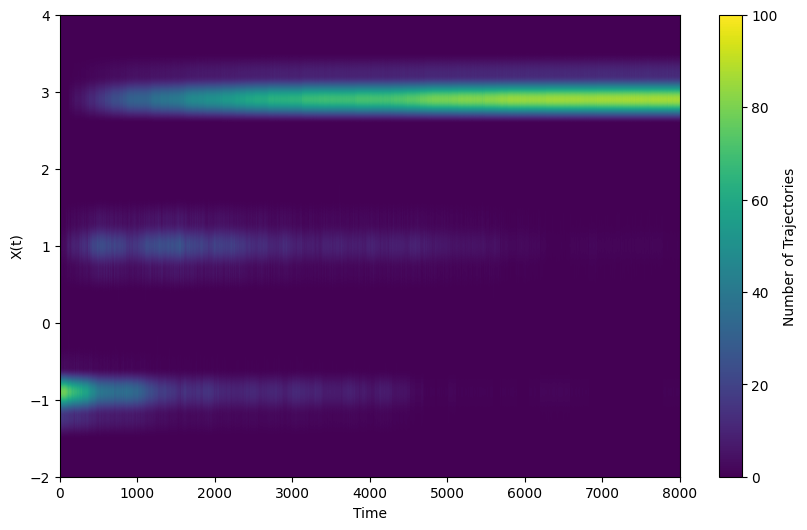

In [15]:
time = np.linspace(0, T, num_steps+1)

# Downsample factor to reduce memory usage for plotting
ds = 2  # take every 1000th time step for visualization
time_ds = time[::ds]

# Define state bins for the heatmap (y-axis) from -2 to 4 with 300 bins for resolution
y_bins = np.linspace(-2, 4, 20)

# Initialize a density matrix for the downsampled time steps
density_ds = np.zeros((len(y_bins)-1, len(time_ds)))

# Compute the histogram (bin counts) at each downsampled time step across the state range
for i, t_index in enumerate(range(0, len(time), ds)):
    counts, _ = np.histogram(X_em[t_index, :], bins=y_bins)
    density_ds[:, i] = counts

# Plot the density heatmap
plt.figure(figsize=(10, 6))
plt.imshow(density_ds, aspect='auto', 
           extent=[time_ds[0], time_ds[-1], -2, 4],
           origin='lower', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.colorbar(label='Number of Trajectories')
plt.ylim(-2, 4)
plt.savefig('heatmap.svg', transparent=True) 